# Problem Statement and Objective

I am a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to 
change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the 
data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at 
the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that 
allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

As a Data Scientist at "Visit with us" travel company I would analyze the customers' data and information to provide 
recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly 
introduced travel package. The model will be built to make predictions before a customer is contacted.

Thus, the objective of this analysis is to predict which customer is more likely to purchase the newly introduced travel 
package.

In [1]:
#Importing necessary libraries and packages for the analysis

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel(r'Tourism.xlsx', sheet_name='Tourism') #Import dataset and the desired sheet name


In [4]:
df1=data.copy() #Copy dataset for version control

In [5]:
df2=data.copy()

In [6]:
df3=data.copy()

In [7]:
df4=data.copy()

In [8]:
df1.head() #Display  some part of the dataset - first five rows of the dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
df2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering

In [10]:
df2.Gender.value_counts() #Identify unique content of the Gender column 

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [11]:
df2['Gender'] = df2['Gender'].astype(str).replace('Fe Male', 'Female').astype('category') #Feature Engineering

In [12]:
df2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
df2.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [14]:
data2=df2.copy() #For version control copy the modified data

In [15]:
data2.shape #Check the shape of the data - rows and columns

(4888, 20)

In [16]:
data2.columns #Identify the original features on the dataset

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [17]:
data2.info() #Get information about the datatypes and idea of missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   object  
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   object  
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   object  
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   object  
 13  NumberOfTrips             4748 non-null   float6

In [18]:
data2.isna().sum() #Identify missing data

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [19]:
for colname in data2.dtypes[data2.dtypes == 'object'].index:
    val_counts = data2[colname].value_counts(dropna=False)  # I want to see NA counts as well
    print(val_counts)
    print('-'*30)

Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------


In [20]:
data2.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

Replace NaN on TypeofContact with Company Invited, since it's fewer than Self Enquiry. The impact will be minimal on analysis

In [21]:
data2['TypeofContact'] = data2['TypeofContact'].astype(str).replace('NaN', 'Company Invited').astype('category')
data2['TypeofContact'] = data2['TypeofContact'].astype(str).replace('nan', 'Company Invited').astype('category')

In [22]:
data2.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
MaritalStatus                 0
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
TypeofContact                 0
ProductPitched                0
dtype: int64

# Feature Engineering Continues

In [23]:
# now using `fillna` with a numeric column
fill_cols=['DurationOfPitch','MonthlyIncome','Age','NumberOfTrips','NumberOfChildrenVisiting','NumberOfFollowups',\
           'PreferredPropertyStar']
for filler in fill_cols:
    data2[filler].fillna(data2[filler].mean(), inplace=True)  # mean imputation


In [24]:
data2.isnull().sum().sort_values(ascending=False)

CustomerID                  0
ProdTaken                   0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
PreferredPropertyStar       0
ProductPitched              0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
Age                         0
MonthlyIncome               0
dtype: int64

In [25]:
data2.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [26]:
data2.pop("CustomerID") #Remove customer ID feature as it is not necessary for the analysis

0       200000
1       200001
2       200002
3       200003
4       200004
5       200005
6       200006
7       200007
8       200008
9       200009
10      200010
11      200011
12      200012
13      200013
14      200014
15      200015
16      200016
17      200017
18      200018
19      200019
20      200020
21      200021
22      200022
23      200023
24      200024
25      200025
26      200026
27      200027
28      200028
29      200029
30      200030
31      200031
32      200032
33      200033
34      200034
35      200035
36      200036
37      200037
38      200038
39      200039
40      200040
41      200041
42      200042
43      200043
44      200044
45      200045
46      200046
47      200047
48      200048
49      200049
50      200050
51      200051
52      200052
53      200053
54      200054
55      200055
56      200056
57      200057
58      200058
59      200059
60      200060
61      200061
62      200062
63      200063
64      200064
65      200065
66      20

In [27]:
data2.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# EDA

# Univariate Analysis

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

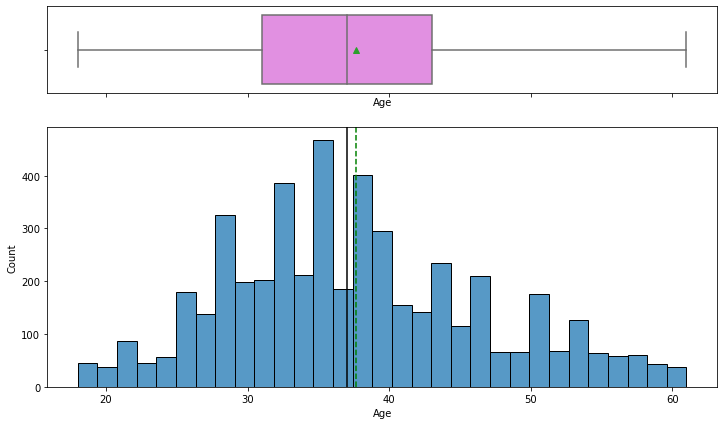

In [29]:
histogram_boxplot(data2, "Age")

Age is not normally distributed, but skewed

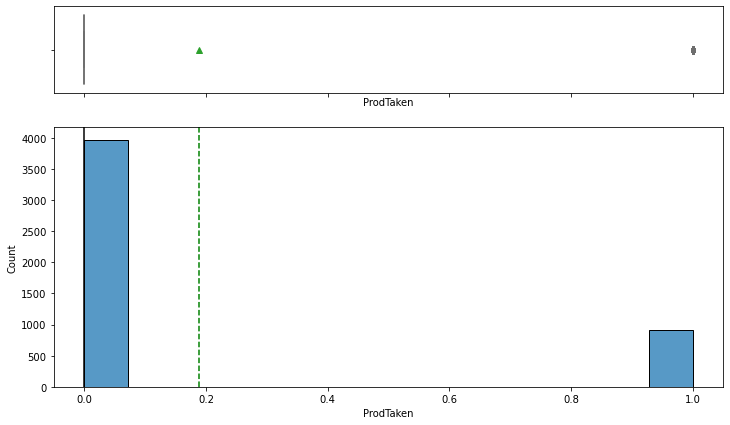

In [30]:
histogram_boxplot(data2, "ProdTaken")

ProdTaken is not normally distributed, but skewed

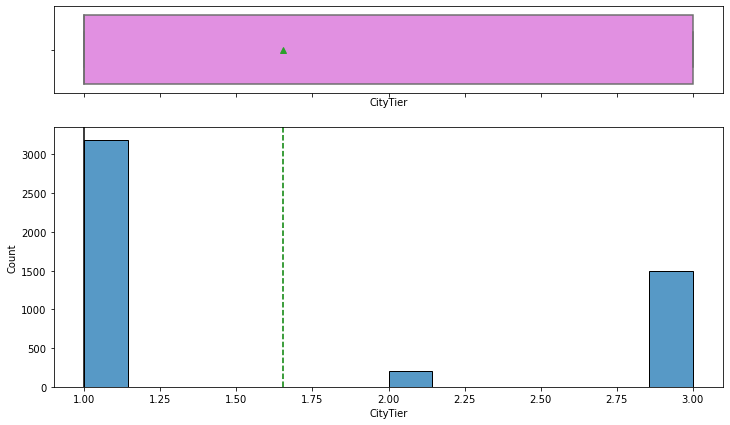

In [31]:
histogram_boxplot(data2, "CityTier")

CityTier is not normally distributed, but skewed

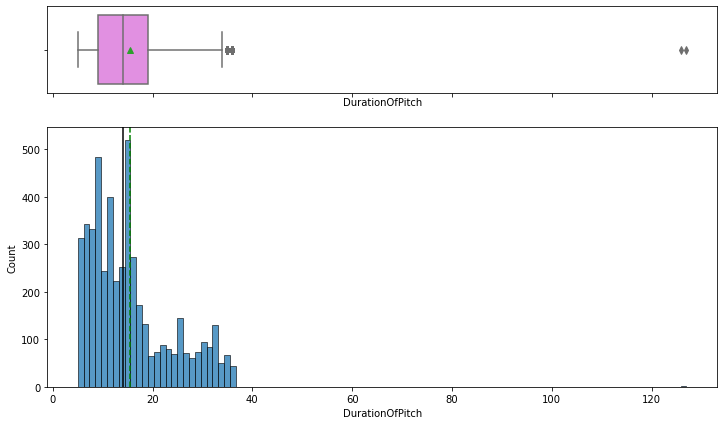

In [32]:
histogram_boxplot(data2, "DurationOfPitch")

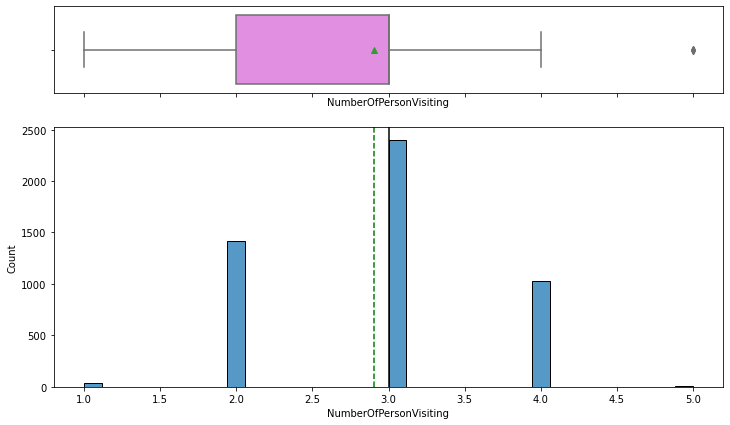

In [33]:
histogram_boxplot(data2, "NumberOfPersonVisiting")

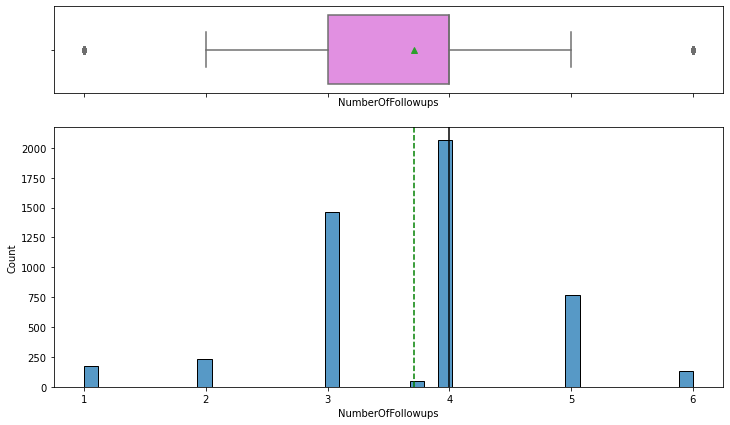

In [34]:
histogram_boxplot(data2, "NumberOfFollowups")

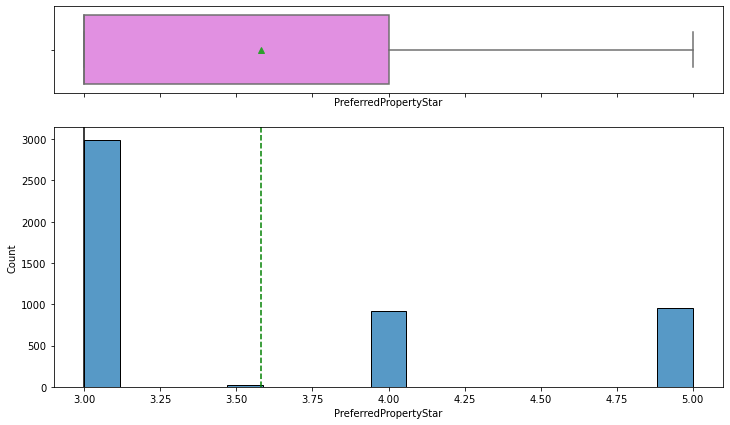

In [35]:
histogram_boxplot(data2, "PreferredPropertyStar")

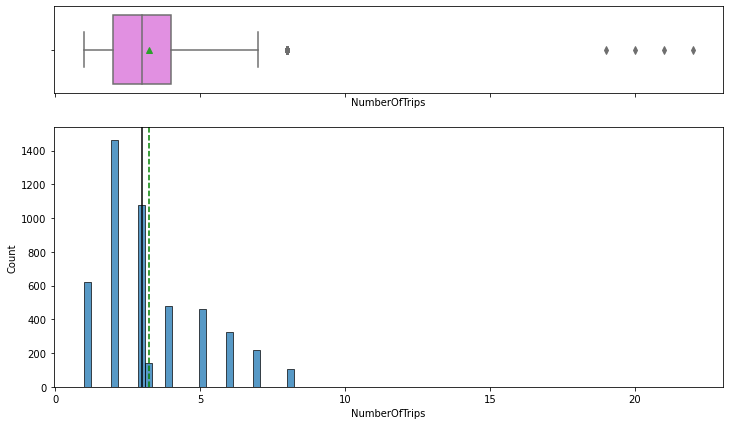

In [36]:
histogram_boxplot(data2, "NumberOfTrips")

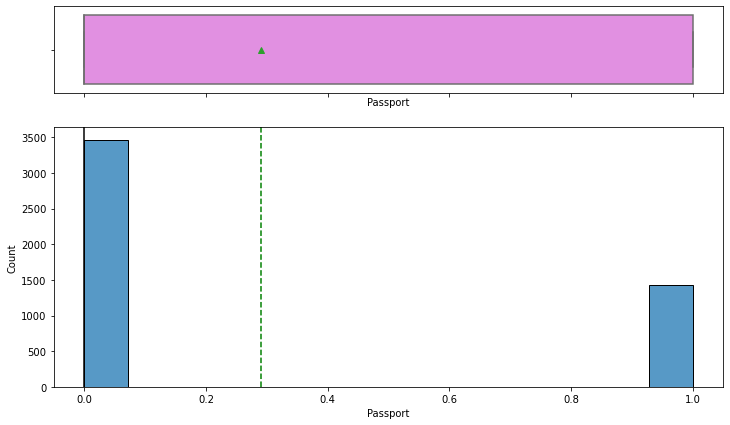

In [37]:
histogram_boxplot(data2, "Passport")

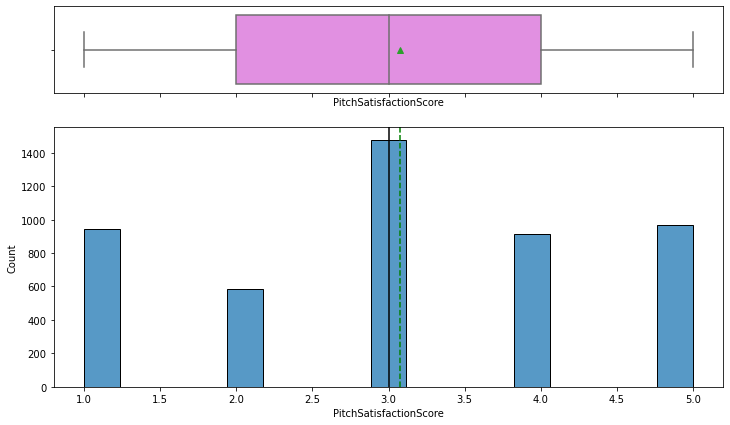

In [38]:
histogram_boxplot(data2, "PitchSatisfactionScore")

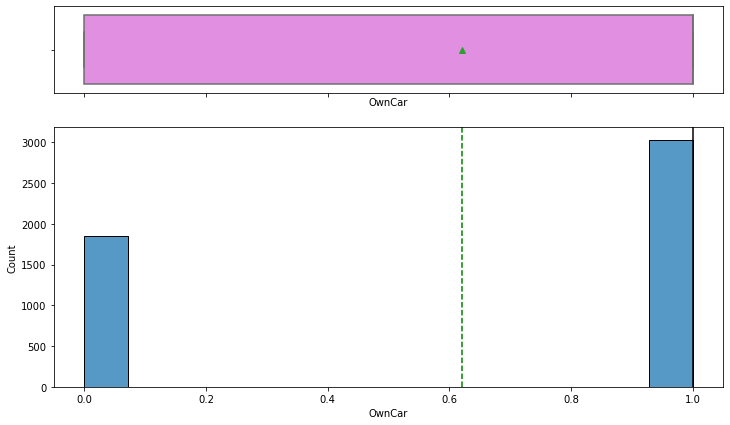

In [39]:
histogram_boxplot(data2, "OwnCar")

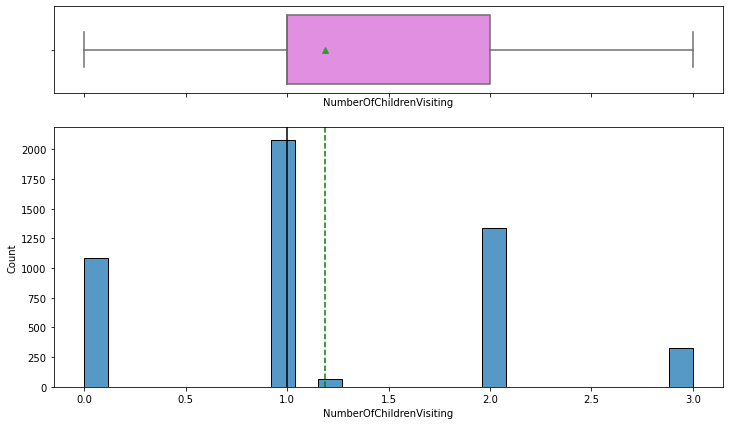

In [40]:
histogram_boxplot(data2, "NumberOfChildrenVisiting")

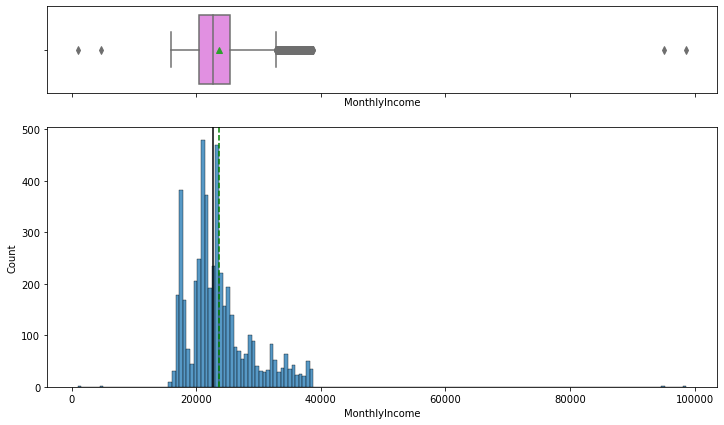

In [41]:
histogram_boxplot(data2, "MonthlyIncome")

All the features are not normally distributed, but skewed

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

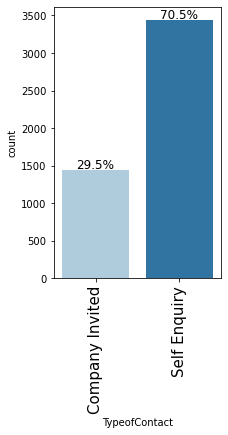

In [44]:
labeled_barplot(data2,'TypeofContact',perc=True)

In [45]:
data2.TypeofContact.value_counts()

Self Enquiry       3444
Company Invited    1444
Name: TypeofContact, dtype: int64

Majority of the customers were contacted through self-enquiry

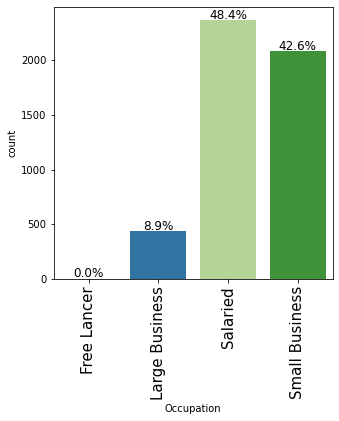

In [46]:
labeled_barplot(data2,'Occupation',perc=True)

Majority of the customers are salaried, and just a few bit Free Lanced

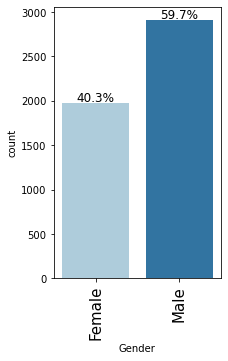

In [47]:
labeled_barplot(data2,'Gender',perc=True)

Majority of the customers are Male

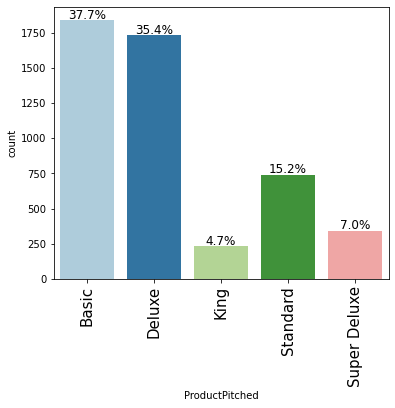

In [48]:
labeled_barplot(data2,'ProductPitched',perc=True)

Majority of the product pitched are Basic and the least is King

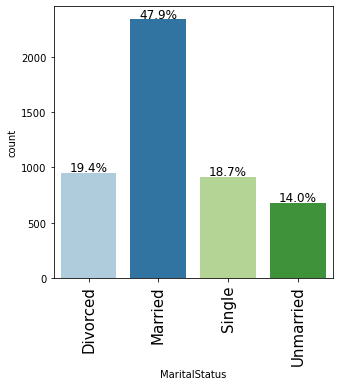

In [49]:
labeled_barplot(data2,'MaritalStatus',perc=True)

Majority of the customers are married with only a few unmarried

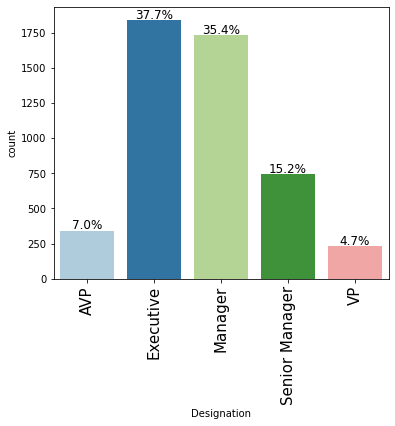

In [50]:
labeled_barplot(data2,'Designation',perc=True)

Majority of the customers are Executives and the least number of them are VPs

# Bivariate Analysis

In [51]:
data2.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [52]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="TypeofContact", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [53]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="CityTier", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [54]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="Occupation", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [55]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="Gender", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [56]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="ProductPitched", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [57]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="PreferredPropertyStar", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [58]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="MaritalStatus", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [59]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="Passport", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [60]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="PitchSatisfactionScore", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [61]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="OwnCar", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [62]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="NumberOfChildrenVisiting", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [63]:
#sns.set(rc={'figure.figsize':(21,7)})
#sns.catplot(x="Designation", y="ProdTaken", kind="swarm", data=data2, height=7, aspect=3);

In [64]:
#sns.catplot(x="Age", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [65]:
#sns.catplot(x="DurationOfPitch", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [66]:
#sns.catplot(x="NumberOfPersonVisiting", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [67]:
#sns.catplot(x="NumberOfFollowups", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [68]:
#sns.catplot(x="NumberOfTrips", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [69]:
#sns.catplot(x="NumberOfChildrenVisiting", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

In [70]:
#sns.catplot(x="MonthlyIncome", y="ProdTaken", data=data2, kind='bar', height=7, aspect=1.5, estimator=np.mean);

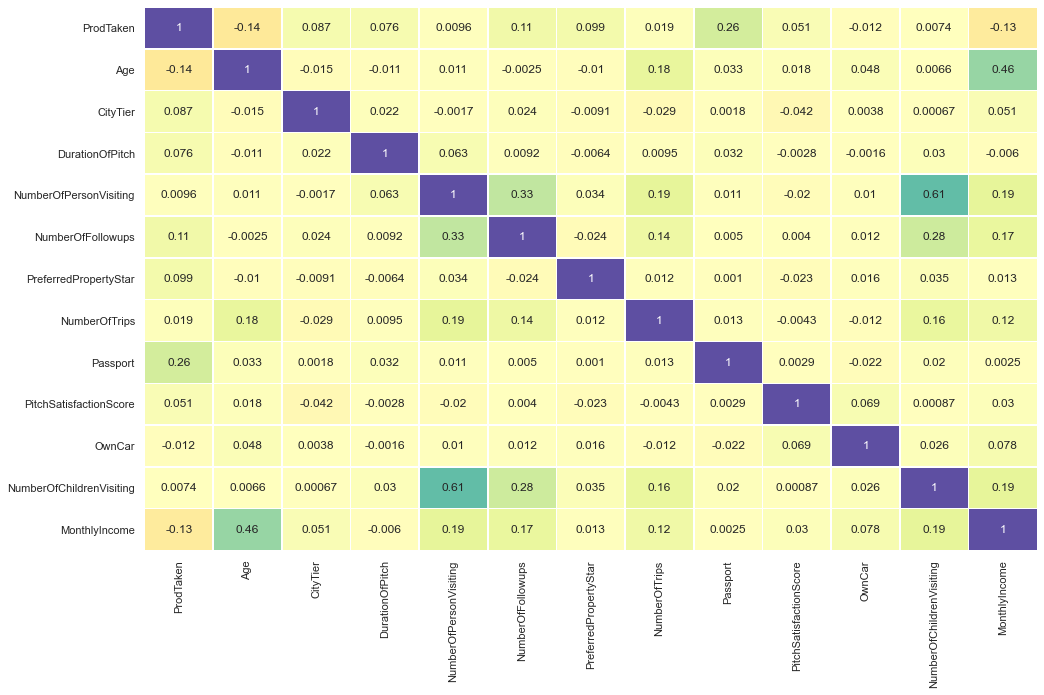

In [71]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

The strongest correlation (0.61) is between number of children visiting and number of person visiting.
The strongest correlations with ProdTaken are with Age and Monthly income (negative) and Number of followups and passports (positive). However, these correlations are low.

In [72]:
## function to plot boxplots w.rt ProdTaken
def boxplot(x):
    plt.figure(figsize=(7,5))
    sns.boxplot(data2['ProdTaken'],x,showfliers=False,palette="PuBu")
    plt.show()

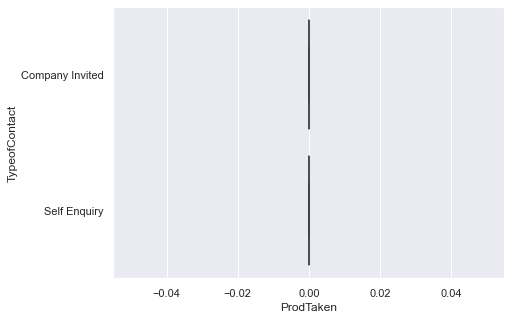

In [73]:
boxplot(data2['TypeofContact'])

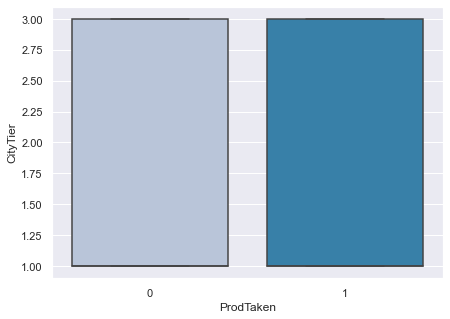

In [74]:
boxplot(data2['CityTier'])

CityTier does not really tell whether a customer will purchase a package or not

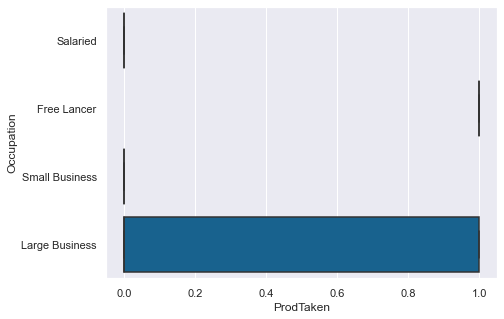

In [75]:
boxplot(data2['Occupation'])

Large Business Occupation tends to purchase the package more and the few Free Lancer in the dataset

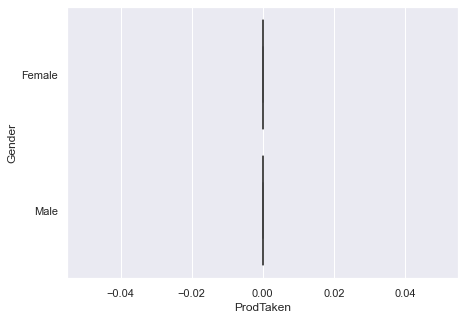

In [76]:
boxplot(data2['Gender'])

Gender does not impact the chance of purchasing the package

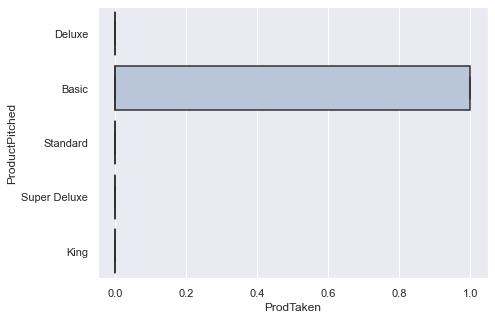

In [77]:
boxplot(data2['ProductPitched'])

Most purchase was Basic

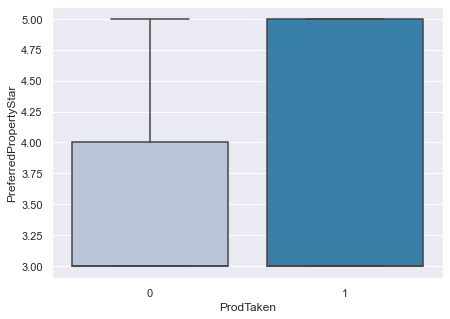

In [78]:
boxplot(data2['PreferredPropertyStar'])

Higher PreferredPropertyStar leads to the higher chance of purchasing the package

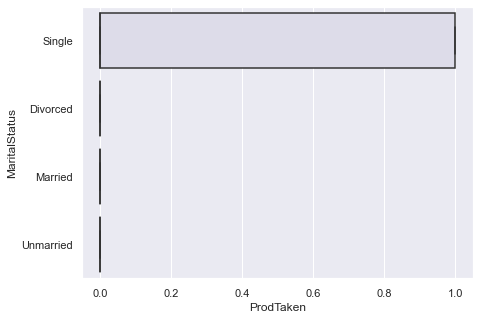

In [79]:
boxplot(data2['MaritalStatus'])

More single people purchased the package

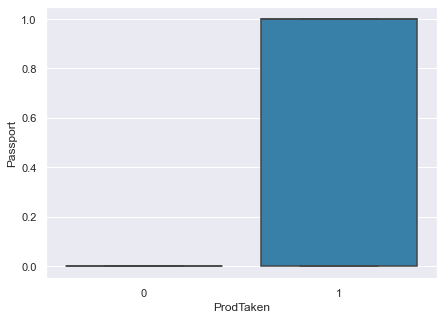

In [80]:
boxplot(data2['Passport'])

Higher Passport holders lead to the higher chance of purchasing the package

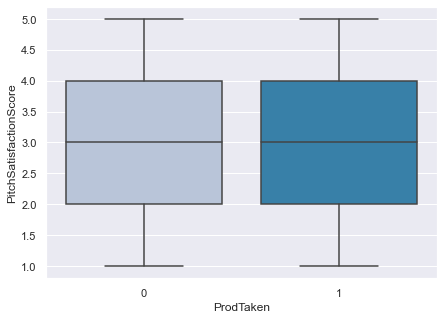

In [81]:
boxplot(data2['PitchSatisfactionScore'])

Product satisfaction score does not impact customers' purchase of the package

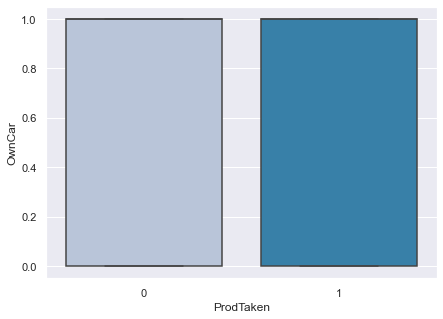

In [82]:
boxplot(data2['OwnCar'])

Owning a car or not does not impact customers' purchase of the package

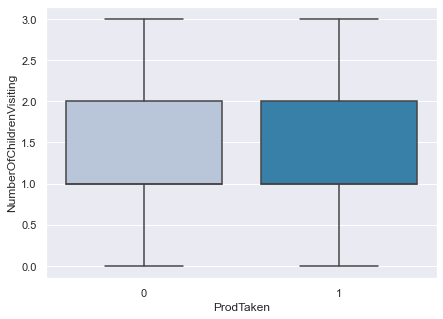

In [83]:
boxplot(data2['NumberOfChildrenVisiting'])

NumberOfChildrenVisiting does not impact customers' purchase of the package

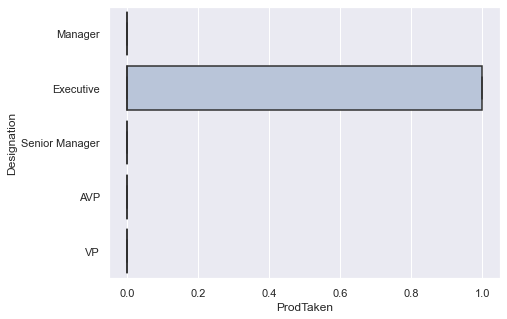

In [84]:
boxplot(data2['Designation'])

More executives purchased the package

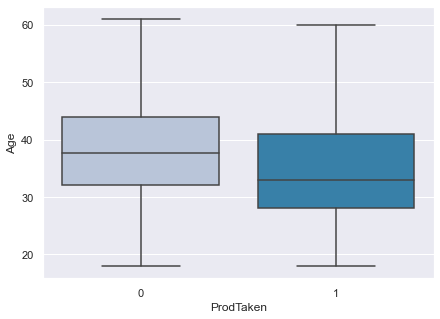

In [85]:
boxplot(data2['Age'])

Customers within lower age range on the average of 34 years tend to purchase the package more

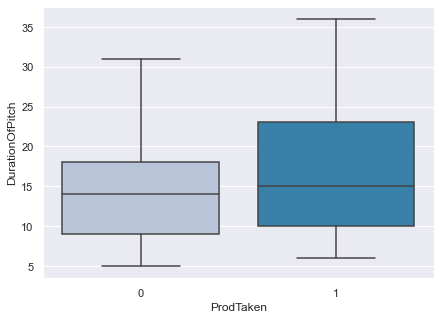

In [86]:
boxplot(data2['DurationOfPitch'])

The higher the duration of pitch (above 15 units in the dataset) the more chance of purchasing the package

In [87]:
data2.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

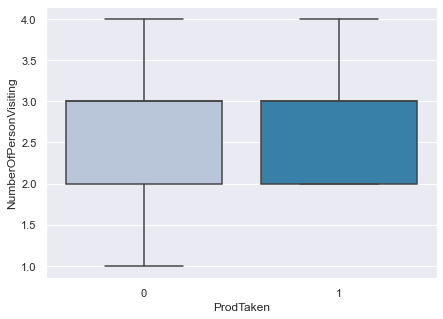

In [88]:
boxplot(data2['NumberOfPersonVisiting'])

For number of person visiting from two and above, the chance of purchasing the package increases

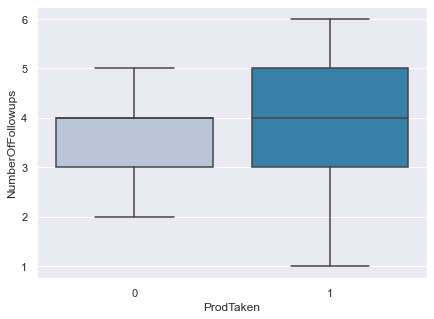

In [89]:
boxplot(data2['NumberOfFollowups'])

The higher the average amount of follow ups the more chance of purchasing the package

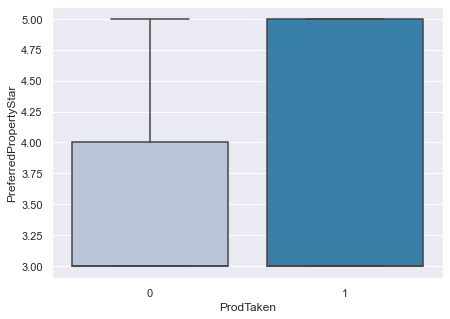

In [90]:
boxplot(data2['PreferredPropertyStar'])

The higher PreferredPropertyStar the more chance of purchasing the package 

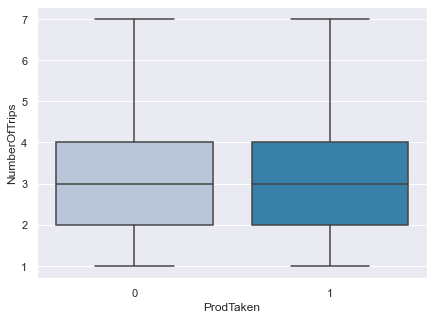

In [91]:
boxplot(data2['NumberOfTrips'])

Number of trips have no impact on purchase of the package

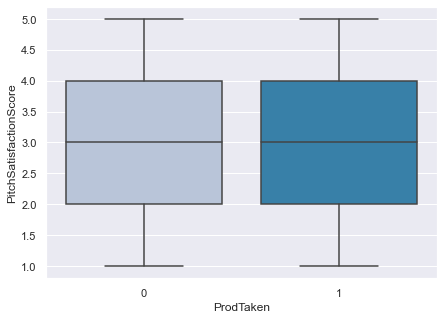

In [92]:
boxplot(data2['PitchSatisfactionScore'])

Number of PitchSatisfactionScore have no impact on purchase of the package

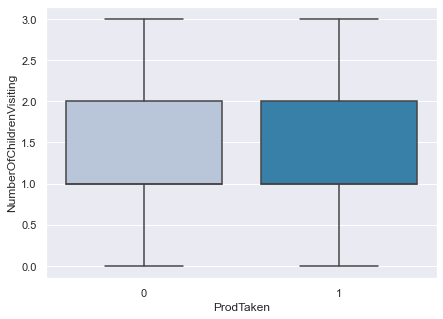

In [93]:
boxplot(data2['NumberOfChildrenVisiting'])

NumberOfChildrenVisiting have no impact on purchase of the package

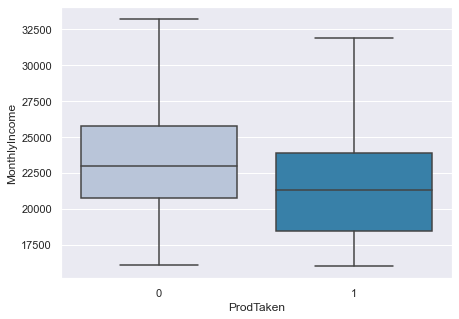

In [94]:
boxplot(data2['MonthlyIncome'])

Customers with lower MonthlyIncome have more chance of purchasing the package

## Create Dummy variables

In [95]:
data3=data2.copy()

In [96]:
data3 = pd.get_dummies(data3, columns=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation'])
data3.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [97]:
data2.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Model Building - Approach
Data preparation.
Split the data into the train and test set.
Train models on the training data.
Try to improve the model performance using hyperparameter tuning.
Test the performance on the test data.

# Split Data

In [98]:
X = data3.drop('ProdTaken', axis=1)
y = data3['ProdTaken']

In [99]:
# Splitting data into training and test set. Stratify data for even distribution of ProdTaken within train and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 34) (1467, 34)


In [100]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [101]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

# Model evaluation criterion
The model can make wrong predictions as:
Predicting a customer has purchased a package when they have not purchased the package.
Predicting a customer has not purchased a package when they have purchased the package.

Which case is more important?

If the model predicts a customer has not purchased a package when they have purchased the package then the company would incur loss of active/loyal customer
If the model predicts a customer has purchased a package when they have not purchased the package then the company would overestimate the customer.

Which metric to optimize?
We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.

In [102]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [103]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.889571  0.673913    0.72093  0.696629


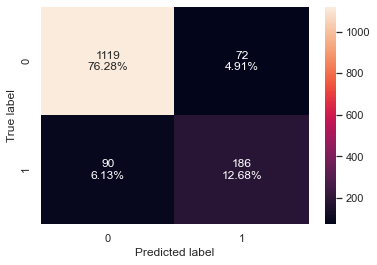

In [104]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

# Hyperparameter Tuning

In [105]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.889571  0.673913    0.72093  0.696629


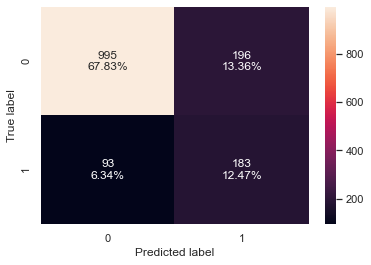

In [106]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

# Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.915474  0.59058   0.936782  0.724444


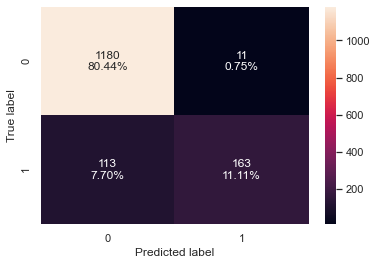

In [107]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

# Hyperparameter Tuning

In [108]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=20,
                       max_features=None, min_samples_split=7, n_estimators=50,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995031  0.996894   0.977169  0.986933
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.911384  0.648551    0.84434  0.733607


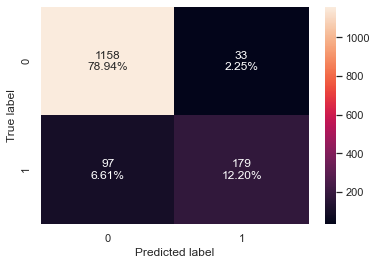

In [109]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

# Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.993277  0.967391     0.9968  0.981875
   Accuracy    Recall  Precision        F1
0  0.908657  0.612319   0.862245  0.716102


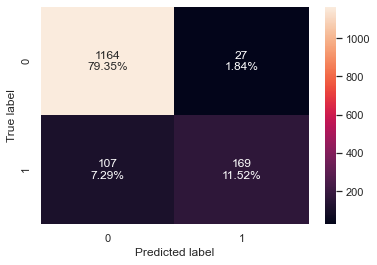

In [110]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

# Hyperparameter Tuning


In [111]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.921609  0.634058   0.925926  0.752688


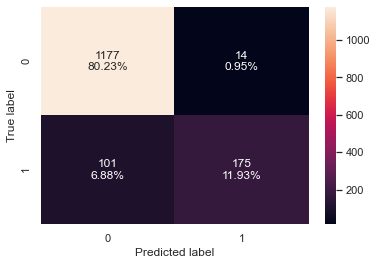

In [112]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

# AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0   0.84829  0.324534   0.713311  0.446105
   Accuracy    Recall  Precision        F1
0  0.848671  0.315217      0.725  0.439394


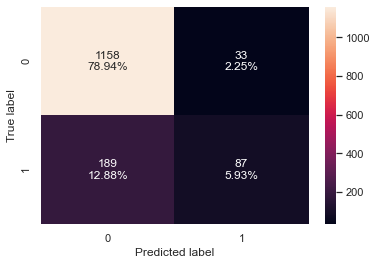

In [113]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

# Hyperparameter Tuning

In [114]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.7000000000000001, n_estimators=100,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0   0.97603  0.891304   0.979522  0.933333
   Accuracy    Recall  Precision        F1
0  0.886844  0.608696   0.743363  0.669323


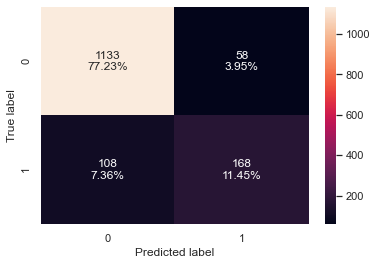

In [115]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

# Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.884537  0.453416   0.871642  0.596527
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.873211  0.416667   0.821429  0.552885


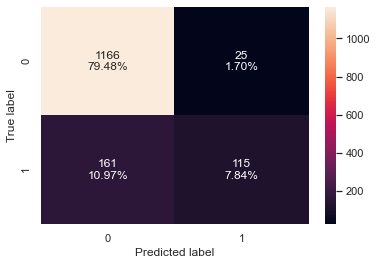

In [116]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

# Hyperparameter Tuning

In [117]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.921076  0.624224   0.934884  0.748603
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.881391  0.474638    0.81875  0.600917


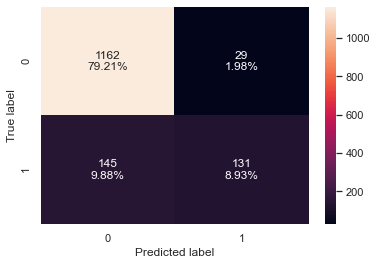

In [118]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

# XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.925699  0.695652   0.884793  0.778905


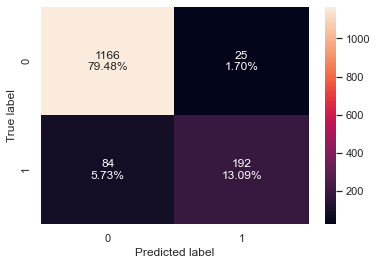

In [119]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

# Hyperparameter Tuning

In [120]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.972523  0.992236   0.877747  0.931487
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.909339  0.815217   0.732899  0.77187


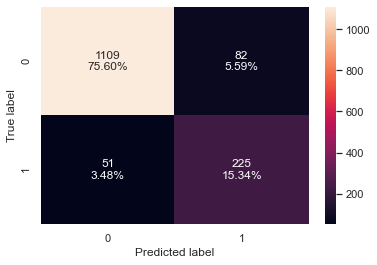

In [121]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

# Stacking Classifier

In [122]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=20,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                    

Training performance:
    Accuracy  Recall  Precision        F1
0  0.963169     1.0   0.836364  0.910891
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.854124  0.844203   0.576733  0.685294


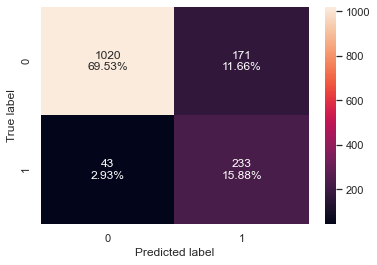

In [123]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

# Comparing all models

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,1.0,0.995031,0.993277,1.0,0.848290,0.976030,0.884537,0.921076,0.999415,0.972523,0.963169
Recall,1.0,1.0,1.0,0.996894,0.967391,1.0,0.324534,0.891304,0.453416,0.624224,0.996894,0.992236,1.000000
Precision,1.0,1.0,1.0,0.977169,0.996800,1.0,0.713311,0.979522,0.871642,0.934884,1.000000,0.877747,0.836364
F1,1.0,1.0,1.0,0.986933,0.981875,1.0,0.446105,0.933333,0.596527,0.748603,0.998445,0.931487,0.910891


In [125]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.889571,0.889571,0.915474,0.911384,0.908657,0.921609,0.848671,0.886844,0.873211,0.881391,0.925699,0.909339,0.854124
Recall,0.673913,0.673913,0.590580,0.648551,0.612319,0.634058,0.315217,0.608696,0.416667,0.474638,0.695652,0.815217,0.844203
Precision,0.720930,0.720930,0.936782,0.844340,0.862245,0.925926,0.725000,0.743363,0.821429,0.818750,0.884793,0.732899,0.576733
F1,0.696629,0.696629,0.724444,0.733607,0.716102,0.752688,0.439394,0.669323,0.552885,0.600917,0.778905,0.771870,0.685294


Based on the F1 scores:
XGBoost Classifier overfits the training set
So, the potential best models are the tuned XGBoost Classifier and the tuned Random Forest model.

# Feature importance of Tuned Random Forest

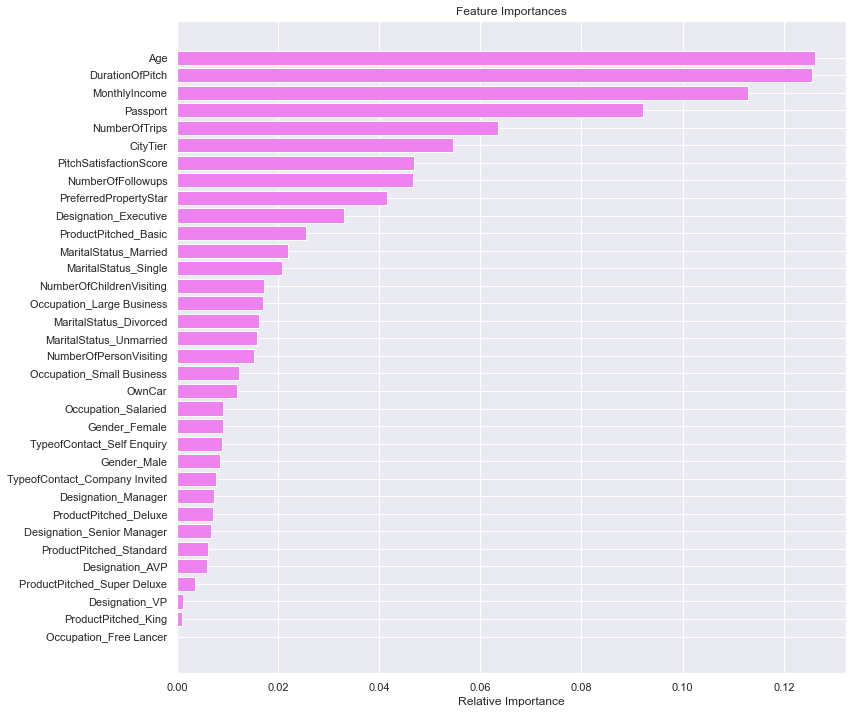

In [126]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
#xgb_tuned
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Feature importance of Tuned XGB Classifier 

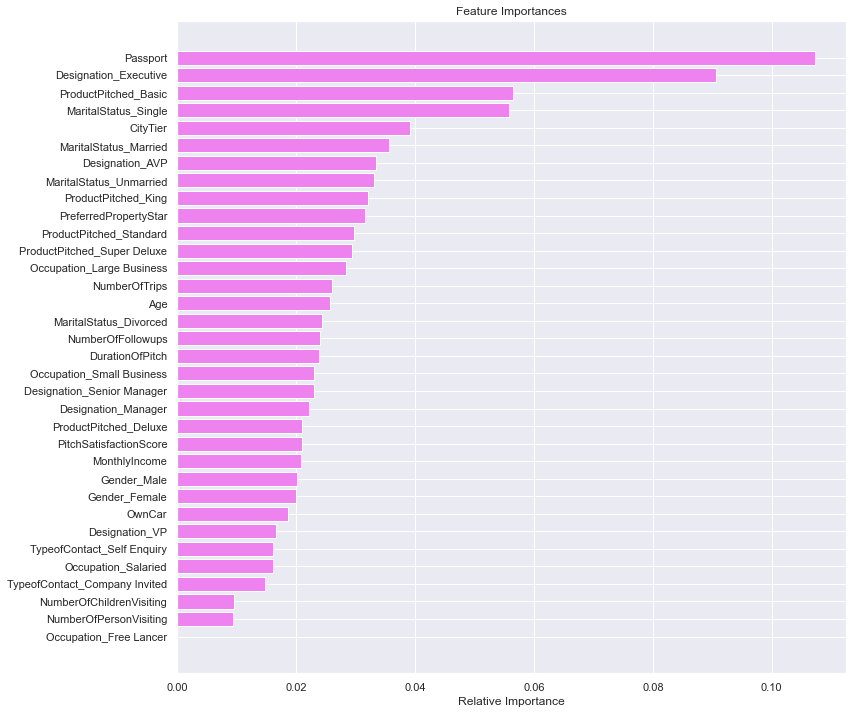

In [127]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

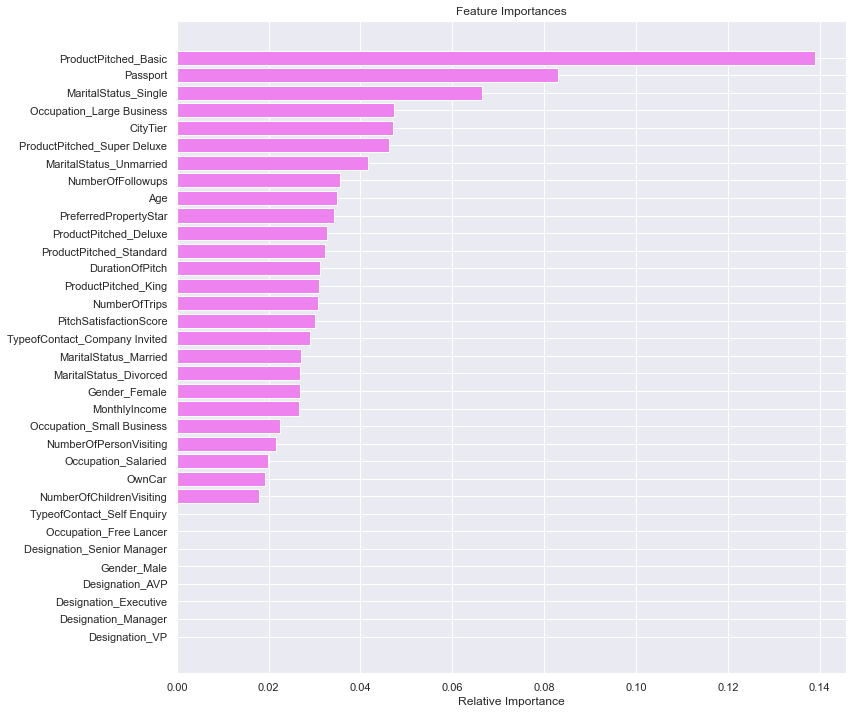

In [128]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion:

- The tuned XGBoost Classifier gave a more accurate prediction of customers who purchased the package. 

- In terms of level of importance of the features used in the tuned XGBoost Classifier, the order of more importance is as follows: Passport, ProductPitched (Basic), Designation_AVP, CityTier, Marital_Status (Single and Married), ProductPitched (Super Deluxe), Designation (VP), Occupation (Large Business), and so on.


- In terms of level of importance of the features used in the tuned Random Forest Classifier, the order of more importance is as follows: Age, Duration of pitch, Monthly income, Passport, Number of trips, CityTier, Number of follow ups and so on.


- Based on our analysis generally, we can say that the ProdTaken (package purchased) has the following relationship with different features: 

    - CityTier does not really tell whether a customer will purchase a package or not.
    - Gender does not impact the chance of purchasing the package
    - Product satisfaction score does not impact customers' purchase of the package
    - Owning a car or not does not impact customers' purchase of the package
    - NumberOfChildrenVisiting does not impact customers' purchase of the package
    - Number of trips have no impact on purchase of the package
    - Number of PitchSatisfactionScore have no impact on purchase of the package
    
    - Large Business Occupation tends to purchase the package more and the few Free Lancer in the dataset.
    - Most purchase was Basic
    - Higher PreferredPropertyStar leads to the higher chance of purchasing the package
    - More single people purchased the package    
    - The higher the duration of pitch (above 15 units in the dataset) the more chance of purchasing the package
    - For number of person visiting from two and above, the chance of purchasing the package increases
    - The higher PreferredPropertyStar the more chance of purchasing the package
    
    - The higher the average amount of follow ups the more chance of purchasing the package  
    - Higher Passport holders lead to the higher chance of purchasing the package
    - Customers within lower age range tend to purchase the package more (majorly between 28 - 42 years)
    - Customers with lower MonthlyIncome have more chance of purchasing the package (between £18000 - £24000)
    
    

In this analysis, the strongest correlation (0.61) is between number of children visiting and number of person visiting. The strongest correlations with ProdTaken are with Age and Monthly income (negative) and Number of followups and passports (positive). However, these correlations are low.

- The model which satisfies the above correlation is the tuned Random Forest Classifier with the order of more importance being Age, Duration of pitch, Monthly income, Passport, Number of trips, CityTier, Number of follow ups and so on.

- Thus, the best model holistically, is the tuned Random Forest model with F1 score - 0.733607, Precision - 0.844340, Recall - 0.648551, and Accuracy - 0.911384.



# Recommendations

- The company should be more precise with the age, duration of pitch, monthly income, passport ownership, and Number of follow ups, occupation, product pitched, marital status, and preferred property star. For example, customers within lower age range on the average of 34 years tend to purchase the package more.

- Once the desired performance is achieved from the model, the company can use it to identify the customers for purchase of the new package. This would help to reduce the cost and increase the efficiency of the process.

- The company should target customers within the lower age range of 28 - 42 years for purchase of the package.

- The company should target customers that earn between mainly £18000 - £24000 monthly for purchase of the package.

- The company should generally target customers going for Basic ProductPitched, higher PreferredPropertyStar, single (marital status), higher number of persons visiting (at least two), passport holders, large business owners, and higher PreferredPropertyStar.

- The company should plan to increase duration of pitch to at least 15 minutes, and increase amount of follow ups, 

